In [13]:
import numpy as np
import pandas as pd

purchase_data = pd.read_excel("Lab Session1 Data.xlsx", sheet_name="Purchase data")

A = purchase_data.iloc[:, 1:].values
C = purchase_data.iloc[:, 0].values

A_mean = np.mean(A, axis=0)
A_std = np.std(A, axis=0)
A_normalized = (A - A_mean) / A_std

dimensionality = A.shape[1]
print("Dimensionality of the vector space:", dimensionality)

num_vectors = A.shape[0]
print("Number of vectors:", num_vectors)

U, S, Vt = np.linalg.svd(A_normalized, full_matrices=False)

S_inv = np.zeros((len(S), len(S)))
S_inv[:len(S), :len(S)] = np.diag(1 / S)

pseudo_inverse_A = np.dot(Vt.T, np.dot(S_inv, U.T))

cost_of_products = np.dot(pseudo_inverse_A, C)
print("Cost of each product:", cost_of_products)

model_vector_X = np.dot(pseudo_inverse_A, C)
print("Model vector X for predicting cost of products:", model_vector_X)

purchase_data['Customer_Class'] = np.where(purchase_data['Payments'] > 200, 'RICH', 'POOR')

X_classifier = purchase_data.iloc[:, 1:-1].values
y_classifier = purchase_data['Customer_Class'].values

print("Shape of X_classifier:", X_classifier.shape)
print("Shape of y_classifier:", y_classifier.shape)


Dimensionality of the vector space: 21
Number of vectors: 10


LinAlgError: SVD did not converge

NameError: name 'pseudo_inverse_A' is not defined

Mean of Price data: 1560.6634538152612
Variance of Price data: 58732.36535253922
Mean of Wednesday prices: nan
Mean of April prices: 1698.9526315789474
Probability of making a loss: 0.4979919678714859
No Wednesday prices available.


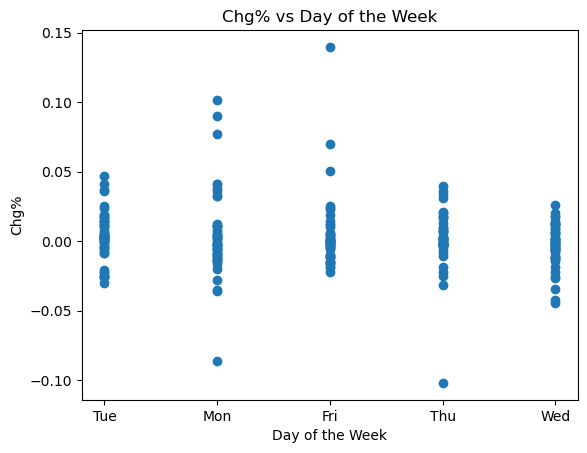

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

stock_price_data = pd.read_excel("Lab Session1 Data.xlsx", sheet_name="IRCTC Stock Price")

price_mean = stock_price_data['Price'].mean()
price_variance = stock_price_data['Price'].var()
print("Mean of Price data:", price_mean)
print("Variance of Price data:", price_variance)

wednesday_prices = stock_price_data[stock_price_data['Day'] == 'Wednesday']['Price']
wednesday_mean = wednesday_prices.mean()
print("Mean of Wednesday prices:", wednesday_mean)

april_prices = stock_price_data[stock_price_data['Month'] == 'Apr']['Price']
april_mean = april_prices.mean()
print("Mean of April prices:", april_mean)

loss_probability = len(stock_price_data[stock_price_data['Chg%'] < 0]) / len(stock_price_data)
print("Probability of making a loss:", loss_probability)

if len(wednesday_prices) > 0:  
    wednesday_profit_probability = len(stock_price_data[(stock_price_data['Day'] == 'Wednesday') & (stock_price_data['Chg%'] > 0)]) / len(wednesday_prices)
    print("Probability of making a profit on Wednesday:", wednesday_profit_probability)
    conditional_profit_given_wednesday = wednesday_profit_probability / len(stock_price_data[stock_price_data['Day'] == 'Wednesday'])
    print("Conditional probability of making profit given today is Wednesday:", conditional_profit_given_wednesday)
else:
    print("No Wednesday prices available.")

plt.scatter(stock_price_data['Day'], stock_price_data['Chg%'])
plt.xlabel("Day of the Week")
plt.ylabel("Chg%")
plt.title("Chg% vs Day of the Week")
plt.show()
